In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the 20 Newsgroups dataset (subset of categories)
newsgroups = fetch_20newsgroups(subset='all')

# Split into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Limit vocabulary size to 10,000
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences of integers (tokenized text)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure uniform length (256 words max)
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=256)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=256)

# Convert labels to one-hot encoded format
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=20)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=20)

In [2]:
# Build the LSTM model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=256),  # Embedding layer
    tf.keras.layers.LSTM(128),  # LSTM layer
    tf.keras.layers.Dense(64, activation='relu'),  # Dense layer
    tf.keras.layers.Dense(20, activation='softmax')  # Output layer (20 classes)
])

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
print("Training LSTM model...")
lstm_history = lstm_model.fit(X_train_pad, y_train_onehot, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test_onehot))

# Evaluate the LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_pad, y_test_onehot)
print(f"LSTM Model - Test Loss: {lstm_loss:.4f}, Test Accuracy: {lstm_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training LSTM model...
Epoch 1/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.0733 - loss: 2.9644 - val_accuracy: 0.0960 - val_loss: 2.8926
Epoch 2/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.1156 - loss: 2.8148 - val_accuracy: 0.1369 - val_loss: 2.7674
Epoch 3/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.2053 - loss: 2.5076 - val_accuracy: 0.2419 - val_loss: 2.2638
Epoch 4/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.3485 - loss: 1.9317 - val_accuracy: 0.4202 - val_loss: 1.7801
Epoch 5/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5546 - loss: 1.3065 - val_accuracy: 0.5796 - val_loss: 1.2975
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5614 - loss: 1.3252
LSTM Model - Test Loss: 1.2975, Test Accuracy: 0.5796


In [3]:
# Build the GRU model
gru_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=256),  # Embedding layer
    tf.keras.layers.GRU(128),  # GRU layer
    tf.keras.layers.Dense(64, activation='relu'),  # Dense layer
    tf.keras.layers.Dense(20, activation='softmax')  # Output layer (20 classes)
])

gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the GRU model
print("Training GRU model...")
gru_history = gru_model.fit(X_train_pad, y_train_onehot, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test_onehot))

# Evaluate the GRU model
gru_loss, gru_accuracy = gru_model.evaluate(X_test_pad, y_test_onehot)
print(f"GRU Model - Test Loss: {gru_loss:.4f}, Test Accuracy: {gru_accuracy:.4f}")

Training GRU model...
Epoch 1/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.0839 - loss: 2.9496 - val_accuracy: 0.1268 - val_loss: 2.7858
Epoch 2/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.1697 - loss: 2.6559 - val_accuracy: 0.2504 - val_loss: 2.1924
Epoch 3/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4127 - loss: 1.6555 - val_accuracy: 0.7379 - val_loss: 0.8695
Epoch 4/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8408 - loss: 0.5308 - val_accuracy: 0.7963 - val_loss: 0.7091
Epoch 5/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9298 - loss: 0.2351 - val_accuracy: 0.8210 - val_loss: 0.7061
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8085 - loss: 0.7611
GRU Model - Test Loss: 0.7061, Test Accuracy: 0.8210


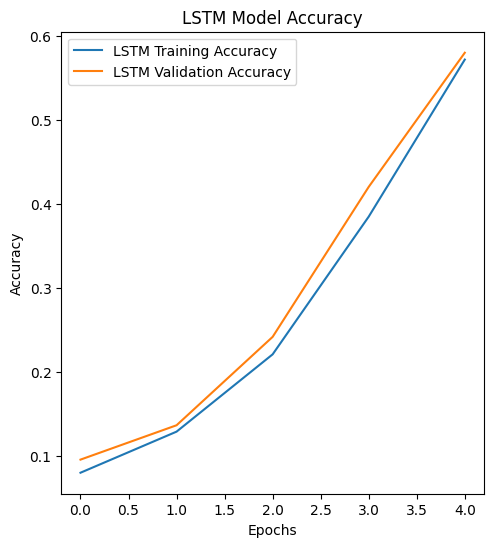

In [4]:
# ============ Plot Training and Validation Accuracy/Loss ============

plt.figure(figsize=(12, 6))

# Plot for LSTM Model
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

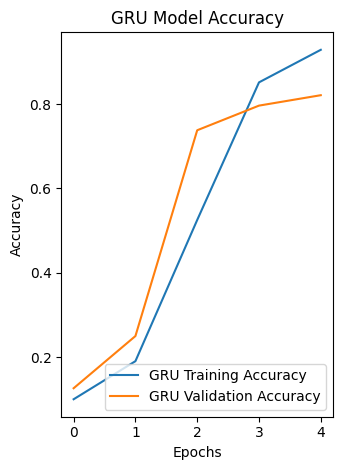

In [5]:
# Plot for GRU Model
plt.subplot(1, 2, 2)
plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.title('GRU Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()